In [1]:
import pandas as pd
data = pd.read_csv('fp00t30000g40k0odfnew.txt', sep='\s+', header=None)
data = pd.DataFrame(data)
import matplotlib.pyplot as plt
x = data[3]
y = data[4]
fig, ax = plt.subplots()
ax.plot(x,y,'g')
ax.set_xlim(0,0.4e16)
ax.set_xlabel('Frequency Hz')
ax.set_ylabel('flux in erg/sec/cm2/Hz/ster')

#plt.title('2500to10500res500000')
plt.savefig('fp00t30000g40k0odfnew.png',dpi=720,transparent=False,bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()


<Figure size 640x480 with 1 Axes>

Text(0, 0.5, 'Flux Axis(erg / (Angstrom cm2 s))')

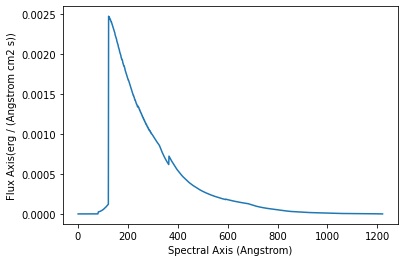

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum
data = np.loadtxt('fp00t30000g40k0.txt')
a = data[:, 0]
x = data[:, 3]
y = data[:, 4]
c = (4*y*3*10**8)/(a**2) 
spectral_axis=(a * u.AA)
flux=(y * (u.erg / (u.cm ** 2 * u.s * u.AA)))
spectrum = Spectrum1D(flux, spectral_axis)
from matplotlib import pyplot as plt
plt.plot(spectrum.spectral_axis, spectrum.flux) 
plt.xlabel('Spectral Axis ({})'.format(spectrum.spectral_axis.unit)) 
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit)) 
#plt.ylim(580000,675000)
#plt.savefig('2500-10500fp05t5750g40k2odfnew.png',dpi=720,transparent=False,bbox_inches='tight',facecolor='w', edgecolor='w')


In [45]:
a

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.219e+03, 1.220e+03,
       1.221e+03])

In [49]:
from specutils.manipulation import FluxConservingResampler, LinearInterpolatedResampler, SplineInterpolatedResampler
new_disp_grid = np.arange(2500, 10500, 10) * u.AA

/home/ram/snap/jupyter/common/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


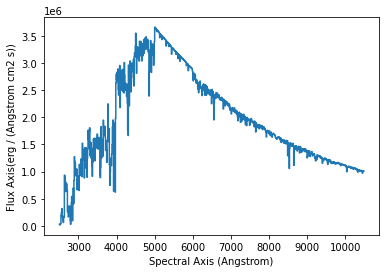

In [51]:
fluxcon = FluxConservingResampler()
new_spec_fluxcon = fluxcon(spectrum, new_disp_grid) 
f, ax = plt.subplots()  
ax.step(new_spec_fluxcon.spectral_axis, new_spec_fluxcon.flux) 
plt.xlabel('Spectral Axis ({})'.format(spectrum.spectral_axis.unit)) 
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit)) 
plt.savefig('f2500-10500vr0p00t5750g40_cutoff_0_1_10A.png',dpi=720,transparent=False,bbox_inches='tight',facecolor='w', edgecolor='w')
